# Game of Life
This is our week 6 examples notebook and will be available on Github from the powderflask/cap-comp215 repository.
As usual, the first code block just imports the modules we will use.

In [40]:
import math, re
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate2d

## 2D Correlation with a 2D Kernel and 19 state lookup table (0 - 18)

In [41]:
np.random.seed(42)
state = np.random.randint(2, size=(10, 10), dtype=np.uint8)

kernel = np.array([[1, 1, 1],
                   [1,10, 1],
                   [1, 1, 1]])

table = np.zeros(19, dtype=np.uint8)
table[[3, 12, 13]] = 1

dot_p = correlate2d(state, kernel, mode='same')
new_state = table[dot_p]
print(state)
print(dot_p)
print(new_state)

[[0 0 1 1 1 1 0 1 0 1]
 [0 1 0 1 1 0 0 0 1 1]
 [1 0 1 1 0 0 1 1 0 0]
 [1 0 0 0 0 1 1 0 0 0]
 [0 1 1 1 0 0 1 1 0 1]
 [0 0 0 1 1 1 1 0 1 1]
 [0 1 1 1 1 0 0 1 1 1]
 [0 0 1 0 0 1 0 0 0 0]
 [1 0 1 1 0 1 0 0 1 1]
 [0 0 1 1 0 0 1 1 0 1]]
[[ 1  2 13 14 14 12  2 11  4 12]
 [ 2 13  6 16 15  4  4  4 14 12]
 [12  4 13 13  4  4 13 13  3  2]
 [12  5  5  4  3 13 15  5  3  1]
 [ 2 12 13 13  5  6 15 14  4 12]
 [ 2  4  7 16 15 14 14  6 16 14]
 [ 1 12 14 15 15  5  4 13 14 13]
 [ 2  5 15  6  5 12  3  3  5  4]
 [10  4 14 14  4 12  4  3 13 12]
 [ 1  3 13 13  3  2 12 12  4 12]]
[[0 0 1 0 0 1 0 0 0 1]
 [0 1 0 0 0 0 0 0 0 1]
 [1 0 1 1 0 0 1 1 1 0]
 [1 0 0 0 1 1 0 0 1 0]
 [0 1 1 1 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 1 1 1 0 0]
 [0 0 0 0 0 1 0 1 1 1]
 [0 1 1 1 1 0 1 1 0 1]]


# Display CA as 2-D image

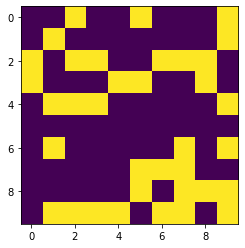

In [42]:
plt.imshow(new_state)

## Python: argument unpacking

In [43]:
def my_func(*args, **kwargs):
    assert type(args) == tuple
    assert type(kwargs) == dict
    print('positional args:', args)
    print('keyword args:', kwargs)

my_func(42, 'hello', foo='choo', bar=[1,2,3])

positional args: (42, 'hello')
keyword args: {'foo': 'choo', 'bar': [1, 2, 3]}


## Python: dictionaries and argument unpacking

In [44]:
d1 = {
    'a' : 1,
    'b' : 2,
    'c' : 3,
}

d2 = dict(a=1, b=2, c=3)

assert d1 == d2

print(d1, d2)

my_func(**d1)

{'a': 1, 'b': 2, 'c': 3} {'a': 1, 'b': 2, 'c': 3}
positional args: ()
keyword args: {'a': 1, 'b': 2, 'c': 3}


## Python: Class Inheritance
* use with caution - there is **much** to learn about using inheritance correctly!
* see Ch. 19 in Comp115 Think Python textbook for more info

In [48]:
class Point2D:
    """ A point on the 2D Cartesian plane """
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({x}, {y})'.format(x=round(self.x,2), y=round(self.y,2))

    def distance(self, other):
        """ Return distance between this point and other Point2D """
        return math.sqrt((self.x-other.x)**2 + (self.y-other.y)**2)

    @property
    def r(self):
        """ length, r, from origin to this point """
        return self.distance(Point2D(0,0))

    @property
    def theta(self):
        """ angle, in radians, of vector to this point """
        return math.atan2(self.y, self.x)  # faster than SohCahToa

    def polar_coord(self):
        """ return the polar coordinate for this point """
        return (self.r, self.theta)


class PolarPoint2D(Point2D):
    """ A point on the 2D Cartesian plane specified in polar coordinates """
    def __init__(self, r, theta):
        """ define point by length r and angle, theta, in radians """
        super().__init__(x=r*math.cos(theta), y=r*math.sin(theta))


class LabelledPoint2D(Point2D):
    """ A labelled point on a 2D Cartesian plane """
    def __init__(self, x, y, label):
        super().__init__(x, y)
        self.label = label

    def __str__(self):
        return '{point}-{label}'.format(point=super().__str__(), label=self.label)


p1 = Point2D(3, 4)
p2 = PolarPoint2D(5, 0.93)
p3 = LabelledPoint2D(6, 8, 'Here')

print('3 different kinds of points:', type(p1), p1, type(p2), p2, type(p3), p3)
print('Polar coordinates: p1:', p1.polar_coord(), ' p2:', p2.polar_coord())
print('Distance from', p1,'to', p2, ':', p1.distance(p2), ' and visa versa:', p2.distance(p1))
print('Distance from', p1, 'to', p3, ':', p1.distance(p3), ' and visa versa:', p3.distance(p1))

3 different kinds of points: <class '__main__.Point2D'> (3, 4) <class '__main__.PolarPoint2D'> (2.99, 4.01) <class '__main__.LabelledPoint2D'> (6, 8)-Here
Polar coordinates: p1: (5.0, 0.9272952180016122)  p2: (5.0, 0.9299999999999999)
Distance from (3, 4) to (2.99, 4.01) : 0.013523905869487528  and visa versa: 0.013523905869487528
Distance from (3, 4) to (6, 8)-Here : 5.0  and visa versa: 5.0


## For Project Idea: Life Patterns
This code demonstrates how to use a "regular expression" (re) to parse run-length encoded data
 - a regular expression to parse the GoL RLE pattern

In [46]:
rle_pairs = r'(\d+)?([bo$!])'  # 2-tuples, (n, c), where n is optional positive integer and C is one of b,o,$,!
# pattern from https://conwaylife.com/patterns/gosperglidergun.rle
data = '''
24bo11b$22bobo11b$12b2o6b2o12b2o$11bo3bo4b2o12b2o$2o8bo5bo3b2o14b$2o8bo3bob2o4bobo11b$10bo5bo7bo11b$11bo3bo20b$12b2o!
'''
matches = re.findall(rle_pairs, data)
print(matches)

[('24', 'b'), ('', 'o'), ('11', 'b'), ('', '$'), ('22', 'b'), ('', 'o'), ('', 'b'), ('', 'o'), ('11', 'b'), ('', '$'), ('12', 'b'), ('2', 'o'), ('6', 'b'), ('2', 'o'), ('12', 'b'), ('2', 'o'), ('', '$'), ('11', 'b'), ('', 'o'), ('3', 'b'), ('', 'o'), ('4', 'b'), ('2', 'o'), ('12', 'b'), ('2', 'o'), ('', '$'), ('2', 'o'), ('8', 'b'), ('', 'o'), ('5', 'b'), ('', 'o'), ('3', 'b'), ('2', 'o'), ('14', 'b'), ('', '$'), ('2', 'o'), ('8', 'b'), ('', 'o'), ('3', 'b'), ('', 'o'), ('', 'b'), ('2', 'o'), ('4', 'b'), ('', 'o'), ('', 'b'), ('', 'o'), ('11', 'b'), ('', '$'), ('10', 'b'), ('', 'o'), ('5', 'b'), ('', 'o'), ('7', 'b'), ('', 'o'), ('11', 'b'), ('', '$'), ('11', 'b'), ('', 'o'), ('3', 'b'), ('', 'o'), ('20', 'b'), ('', '$'), ('12', 'b'), ('2', 'o'), ('', '!')]
